In [57]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 812.7 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.8 MB/s eta 0:00:00


In [20]:
!pip install -U spacy==3.*
!python -m spacy download en_core_web_sm
!python -m spacy info

  Obtaining dependency information for spacy==3.* from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
      --------------------------------------- 0.3/12.8 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.3/12.8 MB 9.0 MB/s eta 0:00:02
     ------- -------------------------------- 2.4/12.8 MB 13.0 MB/s eta 0:00:01
     ----------- ---------------------------- 3.6/12.8 MB 15.3 MB/s eta 0:00:01
     ------------------ --------------------- 5.8/12.8 MB 20.5 MB/s eta 0:00:01
     ----------------------- ---------------- 7.5/12.8 MB 22.8 MB/s eta 0:00:01
     ----------------------------- ---------- 9.5/12.8 MB 25.4 MB/s eta 0:00:01
     ------------------------------- ------- 10.3/12.8 MB 29.8 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 36.4 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 

In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.2/99.8 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.2/99.8 MB 1.7 MB/s eta 0:01:00
   ---------------------------------------- 0.6/99.8 MB 2.7 MB/s eta 0:00:37
   ---------------------------------------- 1.2/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 2.3/99.8 MB 7.7 MB/s eta 0:00:13
   - -------------------------------------- 3.8/99.8 MB 10.6 MB/s eta 0:00:10
   -- ------------------------------------- 5.5/99.8 MB 14.0 MB/s eta 0:00:07
   -- -----------------------------

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [405]:
df = pd.read_csv("website_classification.csv")
df.head()

Unnamed: 0                                        website_url  \
0           0     https://www.booking.com/index.html?aid=1743217   
1           1                   https://travelsites.com/expedia/   
2           2               https://travelsites.com/tripadvisor/   
3           3              https://www.momondo.in/?ispredir=true   
4           4  https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...   

                                cleaned_website_text Category  
0  official site good hotel accommodation big sav...   Travel  
1  expedia hotel book sites like use vacation wor...   Travel  
2  tripadvisor hotel book sites like previously d...   Travel  
3  cheap flights search compare flights momondo f...   Travel  
4  bot create free account create free account si...   Travel

In [406]:
df = df[~df['Category'].isin(["Forums", "Adult"])]

In [407]:
df = df.drop(['website_url', 'Unnamed: 0'], axis=1)
df.head()

cleaned_website_text Category
0  official site good hotel accommodation big sav...   Travel
1  expedia hotel book sites like use vacation wor...   Travel
2  tripadvisor hotel book sites like previously d...   Travel
3  cheap flights search compare flights momondo f...   Travel
4  bot create free account create free account si...   Travel

In [408]:
df = df.rename(columns={'cleaned_website_text':'Text'})
df.head()

Text Category
0  official site good hotel accommodation big sav...   Travel
1  expedia hotel book sites like use vacation wor...   Travel
2  tripadvisor hotel book sites like previously d...   Travel
3  cheap flights search compare flights momondo f...   Travel
4  bot create free account create free account si...   Travel

In [409]:
nlp = spacy.load('en_core_web_sm')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [410]:
def spacy_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        tokenized_doc = nlp(doc)

        l=[]
        for t in tokenized_doc:
            if not t.is_punct and not t.is_space and t.is_alpha:
                l.append(t.text)
        return l

In [411]:
df['Category'].unique()

array(['Travel', 'Social Networking and Messaging', 'News',
       'Streaming Services', 'Sports', 'Photography',
       'Law and Government', 'Health and Fitness', 'Games', 'E-Commerce',
       'Food', 'Education', 'Computers and Technology',
       'Business/Corporate'], dtype=object)

In [412]:
df['Category_Code'], _ = pd.factorize(df['Category'])
df.head()

Text Category  Category_Code
0  official site good hotel accommodation big sav...   Travel              0
1  expedia hotel book sites like use vacation wor...   Travel              0
2  tripadvisor hotel book sites like previously d...   Travel              0
3  cheap flights search compare flights momondo f...   Travel              0
4  bot create free account create free account si...   Travel              0

In [413]:
df[['Category','Category_Code']].value_counts()

Category                         Category_Code
Education                        11               114
Business/Corporate               13               109
Travel                           0                107
Streaming Services               3                105
Sports                           4                104
E-Commerce                       9                102
Games                            8                 98
Health and Fitness               7                 96
News                             2                 96
Computers and Technology         12                93
Photography                      5                 93
Food                             10                92
Law and Government               6                 84
Social Networking and Messaging  1                 83
Name: count, dtype: int64

In [414]:
category_and_code = df[['Category','Category_Code']].drop_duplicates().reset_index(drop=True)
category_and_code

Category  Category_Code
0                            Travel              0
1   Social Networking and Messaging              1
2                              News              2
3                Streaming Services              3
4                            Sports              4
5                       Photography              5
6                Law and Government              6
7                Health and Fitness              7
8                             Games              8
9                        E-Commerce              9
10                             Food             10
11                        Education             11
12         Computers and Technology             12
13               Business/Corporate             13

In [415]:
category_to_code = dict(category_and_code.values)
category_to_code

{'Travel': 0,
 'Social Networking and Messaging': 1,
 'News': 2,
 'Streaming Services': 3,
 'Sports': 4,
 'Photography': 5,
 'Law and Government': 6,
 'Health and Fitness': 7,
 'Games': 8,
 'E-Commerce': 9,
 'Food': 10,
 'Education': 11,
 'Computers and Technology': 12,
 'Business/Corporate': 13}

In [416]:
code_to_category = dict(df[['Category_Code','Category']].drop_duplicates().values)
code_to_category

{0: 'Travel',
 1: 'Social Networking and Messaging',
 2: 'News',
 3: 'Streaming Services',
 4: 'Sports',
 5: 'Photography',
 6: 'Law and Government',
 7: 'Health and Fitness',
 8: 'Games',
 9: 'E-Commerce',
 10: 'Food',
 11: 'Education',
 12: 'Computers and Technology',
 13: 'Business/Corporate'}

In [417]:
from wordcloud import WordCloud,STOPWORDS

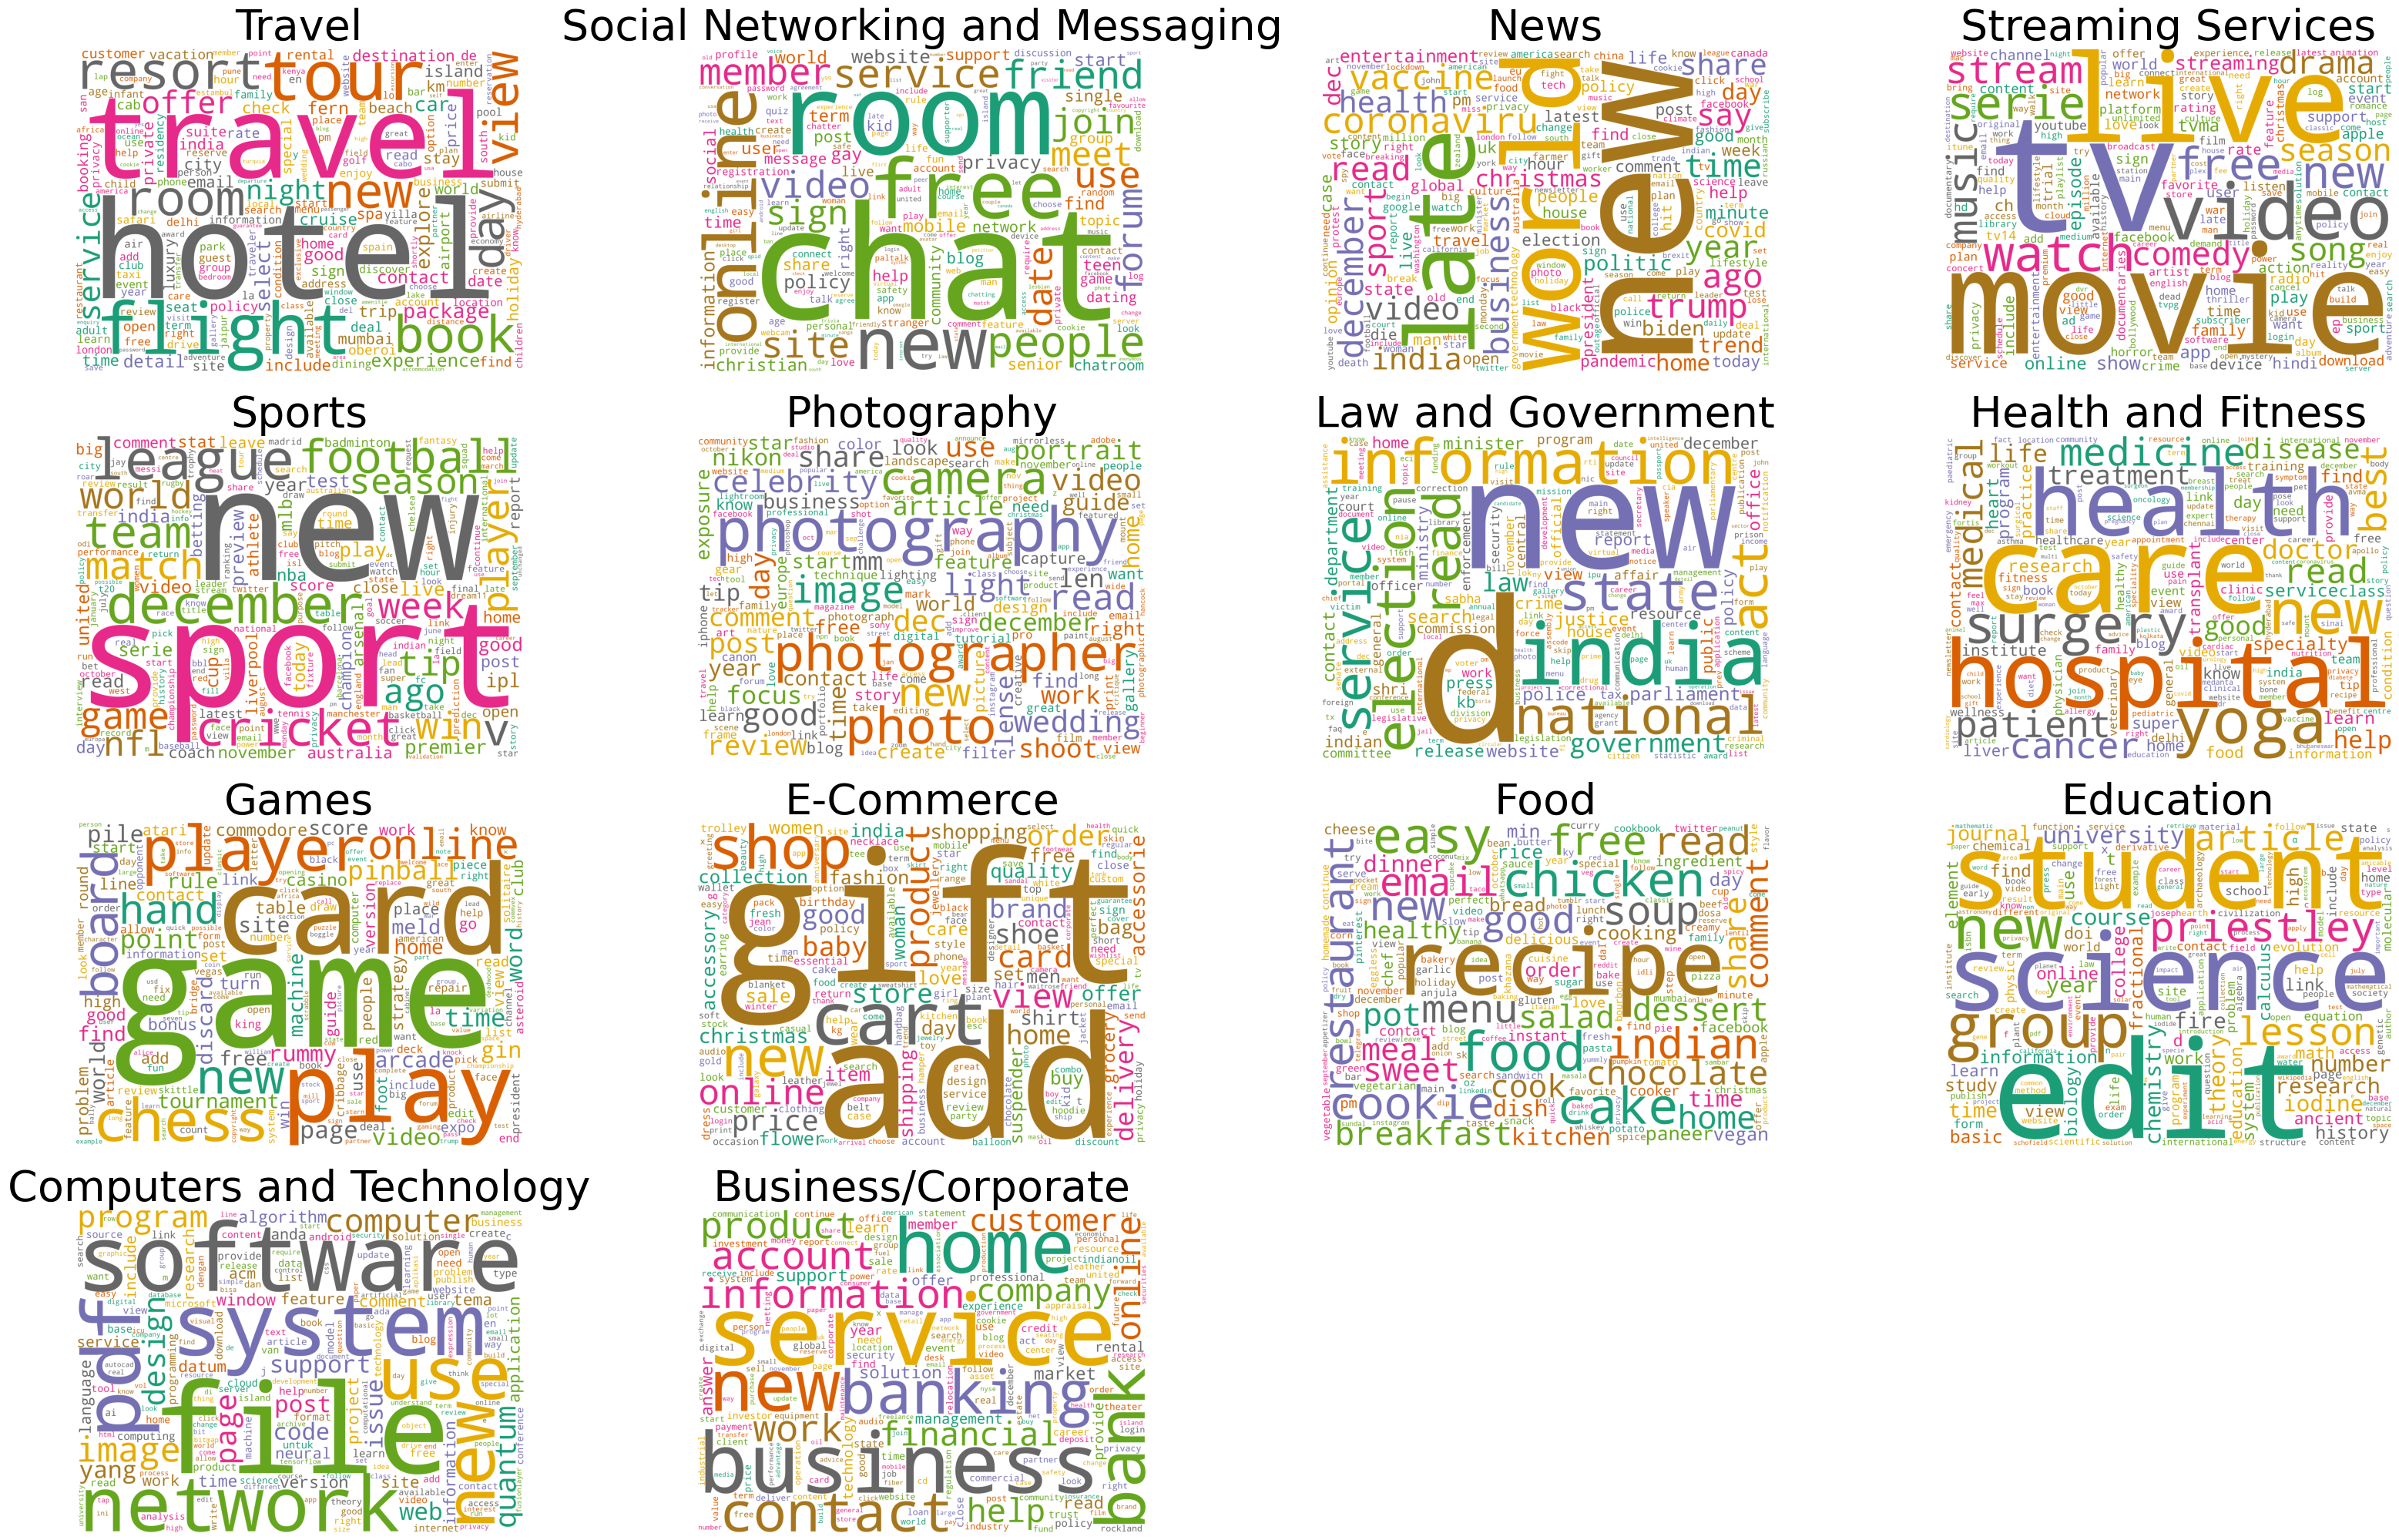

In [418]:
plt.figure(figsize=(40,25))

def plot_category(category,n):
    subset = df[df['Category']==category]
    text = subset['Text'].values
    cloud=WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800
                           ).generate(" ".join(text))
    plt.subplot(4,4,n)
    plt.axis('off')
    plt.title(category,fontsize=40)
    plt.imshow(cloud)

count=1
for category in df['Category'].unique():
    plot_category(category,count)
    count+=1

In [426]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
features = vectorizer.fit_transform(df.Text).toarray()

In [499]:
X = features
y = df['Category_Code']

X.shape

(1376, 18394)

In [428]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, stratify=y_val)

In [430]:
al=[0.005,0.01,0.05,0.10,0.50,1.00,2.00,5.00]
for i in range(len(al)):
    model=MultinomialNB(alpha=al[i])
    model.fit(X_train, y_train)
    
    s1 = model.score(X_train, y_train)
    s2 = model.score(X_val, y_val)
    
    print(al[i]," ",s1," ",s2)

0.005   0.999031007751938   0.8953488372093024
0.01   0.998062015503876   0.9011627906976745
0.05   0.9912790697674418   0.9011627906976745
0.1   0.9903100775193798   0.9011627906976745
0.5   0.9835271317829457   0.877906976744186
1.0   0.9786821705426356   0.8604651162790697
2.0   0.9689922480620154   0.8372093023255814
5.0   0.9428294573643411   0.8023255813953488


In [433]:
model = MultinomialNB(alpha=0.01)

sum=0
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,stratify=y)
    model.fit(X_train,y_train)
    
    sum+=model.score(X_test,y_test)
    print(model.score(X_train,y_train)," ",model.score(X_test,y_test))

print(sum/20)

0.9963636363636363   0.8985507246376812
0.9936363636363637   0.8876811594202898
0.9972727272727273   0.9311594202898551
0.9972727272727273   0.927536231884058
0.9963636363636363   0.9492753623188406
0.9954545454545455   0.8913043478260869
0.9972727272727273   0.9130434782608695
0.9936363636363637   0.9202898550724637
0.9963636363636363   0.8876811594202898
0.9963636363636363   0.9311594202898551
0.9981818181818182   0.9057971014492754
0.9954545454545455   0.9021739130434783
0.9963636363636363   0.9094202898550725
0.9954545454545455   0.9166666666666666
0.9972727272727273   0.9166666666666666
0.9963636363636363   0.927536231884058
0.9954545454545455   0.9166666666666666
0.9954545454545455   0.8985507246376812
0.9972727272727273   0.8840579710144928
0.9954545454545455   0.9021739130434783
0.910869565217391


In [434]:
nlp = spacy.load('en_core_web_sm')
def spacy_tokenizer(doc):
    return [t.lemma_ for t in nlp(doc) if \
            not t.is_punct and \
            not t.is_space and \
            not t.is_stop and \
            t.is_alpha]

In [435]:
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1, 2), stop_words='english')
text_vecs=vectorizer.fit_transform(df.Text).toarray()
text_vecs.shape

C:\Users\sarva\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1376, 591475)

In [436]:
X = text_vecs
y = df['Category_Code']

In [437]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y)

In [438]:
model = MultinomialNB(alpha=0.01)
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,stratify=y)
    model.fit(X_train,y_train)
    
    print(model.score(X_train,y_train)," ",model.score(X_test,y_test))

0.9990909090909091   0.9384057971014492
1.0   0.9347826086956522
0.9990909090909091   0.9456521739130435
0.9990909090909091   0.894927536231884
0.9990909090909091   0.9492753623188406
0.9990909090909091   0.9094202898550725
1.0   0.9239130434782609
0.9990909090909091   0.9384057971014492
0.9990909090909091   0.927536231884058
1.0   0.9311594202898551
0.9990909090909091   0.9094202898550725
0.9990909090909091   0.9239130434782609
0.9990909090909091   0.9130434782608695
0.9990909090909091   0.9130434782608695
0.9990909090909091   0.9347826086956522
0.9990909090909091   0.9311594202898551
1.0   0.9166666666666666
1.0   0.9094202898550725
1.0   0.927536231884058
0.9990909090909091   0.9384057971014492


In [439]:
from sklearn.pipeline import Pipeline

text_classifier = Pipeline([
  ('vectorizer', vectorizer),
  ('classifier', model)
])

In [440]:
X=df['Text']
y=df['Category_Code']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,stratify=y)

In [441]:
text_classifier.fit(X_train,y_train)

C:\Users\sarva\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english',
                                 tokenizer=<function spacy_tokenizer at 0x000001E6AD6E3E20>)),
                ('classifier', MultinomialNB(alpha=0.01))])

In [442]:
text_classifier.score(X_train,y_train)

0.9990909090909091

In [443]:
text_classifier.score(X_test,y_test)

0.9166666666666666

In [494]:
sentence=["The whirring of my laptop fans provided a constant soundtrack as I meticulously coded the new feature for our online store. This wasn't just any update; it was a revolutionary recommendation engine powered by artificial intelligence. The algorithm, a product of countless lines of code and late nights debugging, would analyze customer behavior and purchase history to suggest personalized products. This technology had the potential to transform our business, not only by increasing sales but also by fostering deeper customer engagement.  The excitement crackled in the air as palpable as the static electricity building from my keyboard.  E-commerce, once a simple platform for transactions, was evolving into a sophisticated ecosystem driven by cutting-edge technology.  This was the future, and I was at the forefront, building the tools that would connect customers with the perfect products, all with the help of a little computer magic."]

In [496]:
sentence2=["Enrolled in an online coding Bootcamp to enhance my programming skills and explore the exciting intersection of education and computer technology!"]

In [498]:
arr = text_classifier.predict_proba(sentence2)
table = pd.DataFrame(category_and_code['Category'])
table['Percentage'] = pd.Series(arr.flatten())
table

Category  Percentage
0                            Travel    0.036721
1   Social Networking and Messaging    0.021483
2                              News    0.014936
3                Streaming Services    0.040907
4                            Sports    0.011254
5                       Photography    0.053971
6                Law and Government    0.038335
7                Health and Fitness    0.108761
8                             Games    0.053901
9                        E-Commerce    0.053716
10                             Food    0.006405
11                        Education    0.177282
12         Computers and Technology    0.280853
13               Business/Corporate    0.101475